## 4. Batch Learning

- 전체 데이터를 한 번에 학습하는 것은 비효율적
- 일반적으로 데이터를 학습용, 검증용, 테스트용으로 7:2:1로 나눔
- **SGD (Stochastic Gradient Descent)**: 데이터를 1개씩 랜덤하게 학습
- **Mini-batch SGD**: 여러 개의 샘플을 묶어서 학습
    
    ⇒ 랜덤성과 효율성 둘 다 확보

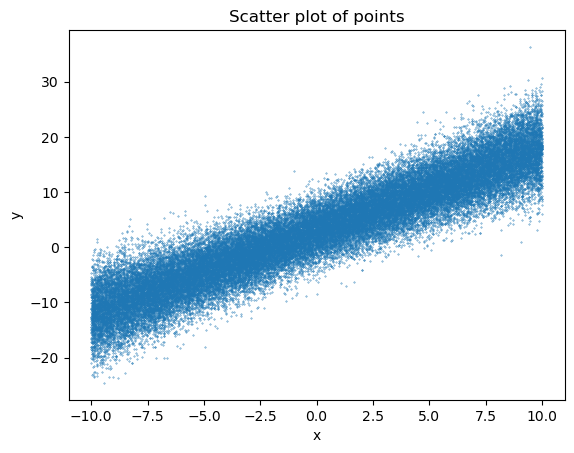

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/points50k.csv')

x, y = data['x'], data['y']

plt.scatter(x, y, s=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of points')
plt.show()

In [5]:
import torch
x_tensor = torch.tensor(x)
y_tensor = torch.tensor(y)

# 학습데이터를 7:3 정도로 train/validation으로 나누기
data_length = len(x_tensor)
split_n = int(data_length * 0.7)
train_x = x_tensor[:split_n]
train_y = y_tensor[:split_n]
val_x = x_tensor[split_n:]
val_y = y_tensor[split_n:]


In [ ]:
g = torch.Generator().manual_seed(42)

# 배치로 데이터를 묶음(mini-batch)
def get_batch(x, y, batch_size):
  data_length = len(x)
  indices = torch.randint(0, data_length, (batch_size,))

  x_batch = x[indices]
  y_batch = y[indices]
  return x_batch, y_batch

In [22]:
a_tensor = torch.tensor(3.0, requires_grad=True)
b_tensor = torch.tensor(2.0, requires_grad=True)

for step in range(100):
  x_batch, y_batch = get_batch(train_x, train_y, 16)
  train_loss = torch.mean((a_tensor * x_batch + b_tensor - y_batch) ** 2)
  val_loss = torch.mean((a_tensor * val_x + b_tensor - val_y) ** 2)
  print(f"step: {step}, train_loss: {train_loss.item()}, val_loss: {val_loss.item()}")
  
  train_loss.backward()

  with torch.no_grad():
    a_tensor -= 0.01 * a_tensor.grad
    b_tensor -= 0.01 * b_tensor.grad

  a_tensor.grad.zero_()
  b_tensor.grad.zero_()

tensor([ 4482,  4524, 26223, 26548, 27189, 30473, 20073, 17741,  7233, 20813,
         5921, 27556,  6651, 15410, 26311,  4558])
step: 0, train_loss: 47.294637500000015, val_loss: 88.37335830666666
tensor([34485, 29388, 28905, 25182, 21871, 16329, 24881, 22815, 19814,  4070,
        30815, 32274, 14429,  2607, 20170, 33543])
step: 1, train_loss: 45.68137708911307, val_loss: 43.289308618896285
tensor([21021,  6273, 31382,  6021,  6313, 17231, 31122, 19144, 28292, 22089,
        22052, 12864, 20245,  1764, 18848, 11332])
step: 2, train_loss: 11.577608779139204, val_loss: 13.289863268621213
tensor([16752, 15730, 28840,  2471, 32258, 25204,  5058, 26020, 27375, 17514,
         4443, 32049,  7497, 32554, 32406, 31432])
step: 3, train_loss: 23.007333098399556, val_loss: 12.898974572456677
tensor([ 9702, 21567, 18124, 16127, 19387,  2685, 17575, 28427, 11987,  8651,
        24096,  9626,  6451,  3304, 30565, 24034])
step: 4, train_loss: 13.37284270358811, val_loss: 15.715882572269935
tensor([

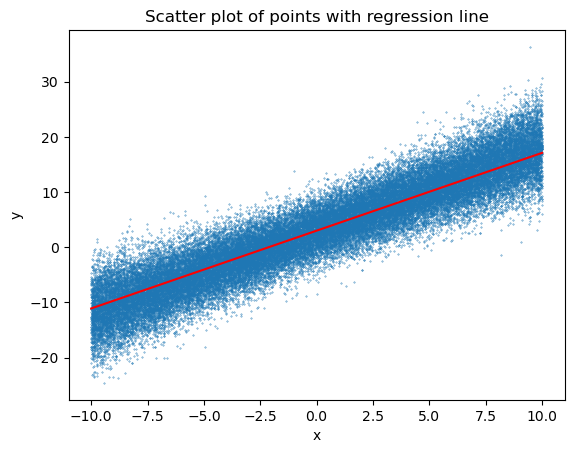

In [23]:
import numpy as np

plt.scatter(x, y, s=0.1)

a =  a_tensor.item()
b = b_tensor.item()

x_line = np.linspace(-10, 10, 100)
y_line = a * x_line + b
plt.plot(x_line, y_line, color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of points with regression line')
plt.show()